In [1]:
# define relevants paths and load functions and libraries

%run Bianchini2025_SC\\Analysis\\helper_functions\\functions_analysis.py
    
data_path = 'Bianchini2025_SC\\Datasets\\' # your data path
saving_path = 'Bianchini2025_SC\\Figures_output\\' # your saving figures path

In [3]:
# import relevant datasets

# load the main dataset
file= ''.join([data_path,'neurons_datasets\\delay_tuning_dataset.mat']) 
data_dict = mat73.loadmat(file)
DAT=data_dict['merged_dataset']

# check keys available
print(DAT.keys())

# extract all keys
for k in DAT.keys():
    globals()[k] = DAT[k]

dict_keys(['AP_lim', 'ML_lim', 'all_boot_aud', 'all_boot_vis', 'animal_ID', 'binSize', 'coord3D', 'depth_lim', 'experiment_ID', 'modality', 'peaks', 'pvals', 'resp', 'spikes', 'trials', 'window_spikes'])


In [4]:
# Plot relationship between visual and auditory latencies and preferred delay - Fig 2A-B

#load the latenices
load_dir = ''.join([data_path,'neurons_datasets\\latencies_vis_aud.npy'])
latencies = np.load(load_dir)

# get the preferred delay
sig_del = []
which_tr = []
for i in range(peaks.shape[0]):
    y = peaks[i,:-2]

    vis_FR = peaks[i,-2]
    aud_FR = peaks[i,-1]

    if vis_FR>aud_FR:
        boot_out = all_boot_vis[i,:]
    elif aud_FR>vis_FR:
        boot_out = all_boot_aud[i,:]
    
    pos_sig = np.argwhere(boot_out>0)
    
    if len(pos_sig)>0:
        sig_del.append(i)
        tr = pos_sig[np.argmax(y[pos_sig])]
        which_tr.append(tr) 

sig_del = np.array(sig_del)
pref_delay=np.array(which_tr)[:,0]

0.6747516488778895
0.9138483469549731


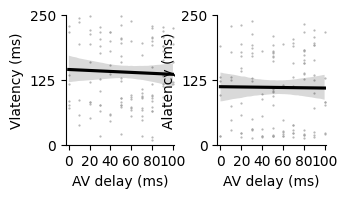

In [5]:
# the preferred delay was not predicted by the difference in the latency of the peak of the unisensory responses - Fig 2A_B
n_delays=11
vis_lat = latencies[:,0]
aud_lat = latencies[:,1]

dims = (1, 2)
fig, ax = plt.subplots(*dims, figsize=(1.3*2, 1.3))
# Adjust the figure margins to eliminate whitespace
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.subplots_adjust(wspace=0.4)

this_ax = ax[0]
AV_tuned_n = np.intersect1d(np.argwhere(modality == 3).flatten(), sig_del)
VM_tuned_n = np.intersect1d(np.argwhere(modality == 5).flatten(), sig_del)

# Combine the tuned neuron indices into a single array
V_tuned_n = np.sort(np.concatenate([AV_tuned_n, VM_tuned_n]))
loc_instersect1 = np.where(np.isin(sig_del, np.argwhere(modality == 3).flatten()))[0]
loc_instersect2 = np.where(np.isin(sig_del, np.argwhere(modality == 5).flatten()))[0]

# Combine the intersection positions
loc_instersect_V = np.sort(np.concatenate([loc_instersect1, loc_instersect2]))
sns.regplot(x=pref_delay[loc_instersect_V], y=vis_lat[V_tuned_n],scatter_kws={"color": '#A0A0A0','s':0.3}, line_kws={"color": 'black'},ax = this_ax)
this_ax.spines["right"].set_visible(False)
this_ax.spines['top'].set_visible(False)
this_ax.set_aspect('auto')
this_ax.set_xlabel('AV delay (ms)', fontsize = 10)
this_ax.set_ylabel('Vlatency (ms)', fontsize = 10)
this_ax.set_xlim([-0.3,10.1])
this_ax.set_ylim([0,250])
this_ax.set_yticks([0,125,250])
this_ax.set_xticks(np.arange(0,n_delays,2),np.arange(0,n_delays,2)*10, fontsize = 10)

x = pref_delay[loc_instersect_V]
y = vis_lat[V_tuned_n]

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(p_value)

this_ax = ax[1]
AV_tuned_n = np.intersect1d(np.argwhere(modality == 3).flatten(), sig_del)
AM_tuned_n = np.intersect1d(np.argwhere(modality == 6).flatten(), sig_del)

# Combine the tuned neuron indices into a single array
A_tuned_n = np.sort(np.concatenate([AV_tuned_n, AM_tuned_n]))
loc_instersect1 = np.where(np.isin(sig_del, np.argwhere(modality == 3).flatten()))[0]
loc_instersect2 = np.where(np.isin(sig_del, np.argwhere(modality == 6).flatten()))[0]

# Combine the intersection positions
loc_instersect_A = np.sort(np.concatenate([loc_instersect1, loc_instersect2]))
sns.regplot(x=pref_delay[loc_instersect_A], y=aud_lat[A_tuned_n],scatter_kws={"color": '#A0A0A0','s':0.3}, line_kws={"color": 'black'},ax = this_ax)
this_ax.spines["right"].set_visible(False)
this_ax.spines['top'].set_visible(False)
this_ax.set_aspect('auto')
this_ax.set_xlabel('AV delay (ms)', fontsize = 10)
this_ax.set_ylabel('Alatency (ms)', fontsize = 10)
this_ax.set_xlim([-0.3,10.1])
this_ax.set_ylim([0,250])
this_ax.set_yticks([0,125,250])
this_ax.set_xticks(np.arange(0,n_delays,2),np.arange(0,n_delays,2)*10, fontsize = 10)

x = pref_delay[loc_instersect_A]
y = aud_lat[A_tuned_n]

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(p_value)

# define a saving directory and save it 
dir = ''.join([saving_path,'Supplementary_Figure3A_B.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)


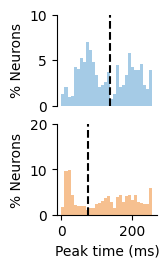

In [6]:
# Plot relationship between visual and auditory latencies and preferred delay - Fig 2C

dims = (2, 1)
fig, axs = plt.subplots(*dims, figsize=(1,2))
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.subplots_adjust(hspace=0.2) 

# modality = 3 is bimodal neurons
this_ax = axs[0]
sns.histplot(latencies[modality==3,0], stat='percent',bins = 30, edgecolor="black", linewidth=0,color='#4D98CE',alpha=0.5,ax=this_ax)
this_ax.set_ylabel('')
this_ax.spines['top'].set_visible(False)
this_ax.spines['right'].set_visible(False)
this_ax.spines['bottom'].set_visible(False)
this_ax.set_ylabel('% Neurons',fontsize=10)

bar_heights_percent = [p.get_height() for p in this_ax.patches]
total_points = len(latencies[modality==1,0])
bin_counts = [height * total_points / 100 for height in bar_heights_percent]
max_bin_count = max(bin_counts)

# Convert the upper limit to percentage
ratio = 0.1  # Change this ratio according to your preference
upper_limit_count = max_bin_count + ratio * max_bin_count
upper_limit_percent = np.round(upper_limit_count / total_points * 100)
# Set the y-axis limit
this_ax.set_ylim(0, upper_limit_percent)
this_ax.set_xticks([])
this_ax.axvline(x=137,color='k', linestyle='--')
this_ax.set_ylim([0,10])

this_ax = axs[1]
sns.histplot(latencies[modality==3,1], stat='percent',bins = 30, edgecolor="black", linewidth=0,color='#EE8222',alpha=0.5,ax=this_ax)
#this_ax.set_xlabel('Peak time (ms)',fontsize=10)
this_ax.set_ylabel('% Neurons',fontsize=10)
this_ax.spines['top'].set_visible(False)
this_ax.spines['right'].set_visible(False)

bar_heights_percent = [p.get_height() for p in this_ax.patches]
total_points = len(latencies[modality==2,1])
bin_counts = [height * total_points / 100 for height in bar_heights_percent]
max_bin_count = max(bin_counts)

# Convert the upper limit to percentage
ratio = 0.1  # Change this ratio according to your preference
upper_limit_count = max_bin_count + ratio * max_bin_count
upper_limit_percent2 = np.round(upper_limit_count / total_points * 100)

# Set the y-axis limit
this_ax.set_ylim(0, 20)
this_ax.axvline(x=76, color='k', linestyle='--')
this_ax.set_xlabel('Peak time (ms)',fontsize=10)
this_ax.set_ylabel('% Neurons',fontsize=10)
this_ax.spines['top'].set_visible(False)
this_ax.spines['right'].set_visible(False)

# define a saving directory and save it 
dir = ''.join([saving_path,'Supplementary_Figure3C.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)


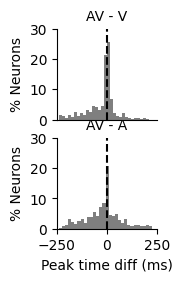

In [7]:
# Plot relationship between visual and auditory latencies and preferred delay - Fig 2D

dims = (2, 1)
fig, axs = plt.subplots(*dims, figsize=(1,2))
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.subplots_adjust(hspace=0.2) 
vis_lat = latencies[modality==3,0]
aud_lat = latencies[modality==3,1]
multi_lat = latencies[modality==3,2]

# Calculate differences
differences = multi_lat - vis_lat
ax = axs[0]
sns.histplot(differences,stat='percent', ax=ax,bins = 30,edgecolor="black", linewidth=0,color='black',alpha=0.5)
ax.set_ylabel('% Neurons',fontsize=10)
ax.set_title('AV - V',fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim([-250,250])
ax.set_xticks([])
ax.axvline(x=0, color='k', linestyle='--')
ax.set_ylim([0,30])

# Calculate differences
ax = axs[1]
differences = multi_lat - aud_lat

sns.histplot(differences,stat='percent', ax=ax,bins = 30,edgecolor="black", linewidth=0,color='black',alpha=0.5)
ax.set_xlabel('Peak time diff (ms)',fontsize=10)
ax.set_ylabel('% Neurons',fontsize=10)
ax.set_title('AV - A',fontsize=10)
ax.spines['top'].set_visible(False)
ax.axvline(x=0, color='k', linestyle='--')
ax.spines['right'].set_visible(False)
ax.set_xlim([-250,250])
ax.set_ylim([0,30])

# define a saving directory and save it 
dir = ''.join([saving_path,'Supplementary_Figure3D.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)